In [44]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
df = pd.read_csv('chess_masters_WCC.csv')
df.columns

Index(['Event', 'Site', 'Date', 'EventDate', 'ECO', 'Round', 'White', 'Black',
       'Result', 'Moves'],
      dtype='object')

> 读取数据和构图

In [51]:
df.head()

,Event,Site,Date,EventDate,ECO,Round,White,Black,Result,Moves
0,World Championship 1st,USA,1886.01.11,1886.01.11,D11,1,"Zukertort, Johannes H","Steinitz, Wilhelm",0-1,d2d4 d7d5 c2c4 c7c6 e2e3 c8f5 b1c3 e7e6 g1f3 b...
1,World Championship 1st,USA,1886.01.13,1886.01.11,C47,2,"Steinitz, Wilhelm","Zukertort, Johannes H",0-1,e2e4 e7e5 g1f3 b8c6 d2d4 e5d4 f3d4 g8f6 b1c3 f...
2,World Championship 1st,USA,1886.01.15,1886.01.11,D10,3,"Zukertort, Johannes H","Steinitz, Wilhelm",1-0,d2d4 d7d5 c2c4 c7c6 e2e3 c8f5 a2a3 e7e6 c4c5 a...
3,World Championship 1st,USA,1886.01.18,1886.01.11,C67,4,"Steinitz, Wilhelm","Zukertort, Johannes H",0-1,e2e4 e7e5 g1f3 b8c6 f1b5 g8f6 e1g1 f6e4 f1e1 e...
4,World Championship 1st,USA,1886.01.20,1886.01.11,D10,5,"Zukertort, Johannes H","Steinitz, Wilhelm",1-0,d2d4 d7d5 c2c4 c7c6 b1c3 g8f6 e2e3 c8f5 c4d5 c...


棋手（节点）个数 25
棋局（连接）个数 685


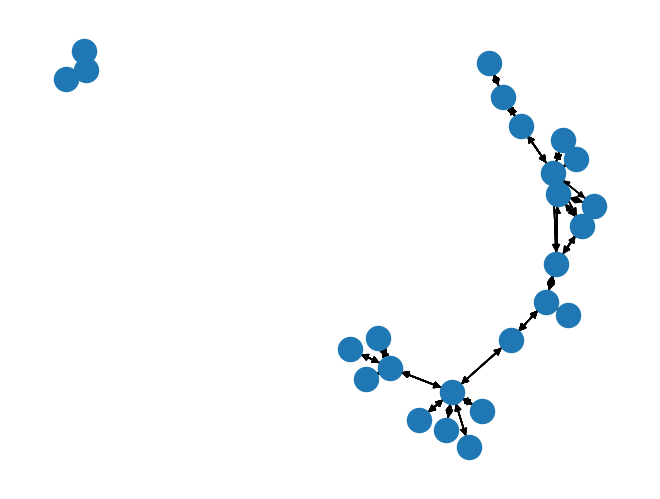

In [49]:
# nx.Graph无向单重图，nx.DiGraph有向单重图
# 多重图（MultiGraph 或 MultiDiGraph） edge_key 参数用于指定 DataFrame 中哪一列的值将用作边的键
G = nx.from_pandas_edgelist(df, 'White', 'Black', ['Event', 'Site', 'Date', 'EventDate', 'ECO', 'Round', 
       'Result', 'Moves'],create_using=nx.MultiDiGraph())
print('棋手（节点）个数', G.number_of_nodes()) # 25
print('棋局（连接）个数', G.number_of_edges()) # 685
pos = nx.spring_layout(G, seed=10)
nx.draw(G, pos) 

In [50]:
# 检查两个节点之间是否有边
if G.has_edge('Zukertort, Johannes H', 'Steinitz, Wilhelm'):
    # 获取所有在两个节点之间的边（包括多重边）的数据
    edges_data = G.edges(['Zukertort, Johannes H', 'Steinitz, Wilhelm'], data=True)
    
    # 由于 edges_data 是一个边视图，我们可以直接迭代它
    for u, v, edge_attr in edges_data:
        # 在这里处理每条边的数据
        if 'Event' in edge_attr:
            event = edge_attr['Event']
            print(f"The event is: {event}")
        else:
            print("The edge does not have an 'Event' attribute.")
else:
    print("There is no edge between Zukertort, Johannes H and Steinitz, Wilhelm.")

The event is: World Championship 1st
The event is: World Championship 1st
The event is: World Championship 1st
The event is: World Championship 1st
The event is: World Championship 1st
The event is: World Championship 1st
The event is: World Championship 1st
The event is: World Championship 1st
The event is: World Championship 1st
The event is: World Championship 1st
The event is: World Championship 1st
The event is: World Championship 1st
The event is: World Championship 1st
The event is: World Championship 1st
The event is: World Championship 1st
The event is: World Championship 1st
The event is: World Championship 1st
The event is: World Championship 1st
The event is: World Championship 1st
The event is: World Championship 1st
The event is: World Championship 2nd
The event is: World Championship 2nd
The event is: World Championship 2nd
The event is: World Championship 2nd
The event is: World Championship 2nd
The event is: World Championship 2nd
The event is: World Championship 2nd
T

In [54]:
#查看图中的边的属性（无向图）
G['Zukertort, Johannes H']['Steinitz, Wilhelm'][0]['Event']


'World Championship 1st'

# 计算各个图指标的数据

- 度中心性（Degree Centrality）: nx.degree_centrality(G)
- 介数中心性（Betweenness Centrality）: nx.betweenness_centrality(G)
- 接近中心性（Closeness Centrality）: nx.closeness_centrality(G)
- 特征向量中心性（Eigenvector Centrality）: nx.eigenvector_centrality(G)
- PageRank: nx.pagerank(G)

In [60]:
# 计算紧密中心性
closeness = nx.closeness_centrality(G)

# 打印每个节点的紧密中心性
for node, closeness_score in closeness.items():
    print(f"节点 {node} 的紧密中心性为: {closeness_score}")

节点 Zukertort, Johannes H 的紧密中心性为: 0.1875
节点 Steinitz, Wilhelm 的紧密中心性为: 0.23557692307692307
节点 Chigorin, Mikhail I 的紧密中心性为: 0.1875
节点 Gunsberg, Isidor A 的紧密中心性为: 0.1875
节点 Lasker, Emanuel 的紧密中心性为: 0.287109375
节点 Marshall, Frank J 的紧密中心性为: 0.21875
节点 Tarrasch, Siegbert 的紧密中心性为: 0.21875
节点 Janowski, Dawid M 的紧密中心性为: 0.21875
节点 Schlechter, Carl 的紧密中心性为: 0.21875
节点 Capablanca, Jose Raul 的紧密中心性为: 0.30624999999999997
节点 Alekhine, Alexander A 的紧密中心性为: 0.3168103448275862
节点 Bogoljubow, Efim D 的紧密中心性为: 0.23557692307692307
节点 Euwe, Max 的紧密中心性为: 0.30624999999999997
节点 Keres, Paul 的紧密中心性为: 0.25520833333333337
节点 Smyslov, Vassily V 的紧密中心性为: 0.25520833333333337
节点 Reshevsky, Samuel H 的紧密中心性为: 0.25520833333333337
节点 Botvinnik, Mikhail M 的紧密中心性为: 0.27425373134328357
节点 Bronstein, David I 的紧密中心性为: 0.21120689655172414
节点 Tal, Mikhail N 的紧密中心性为: 0.21120689655172414
节点 Petrosian, Tigran V 的紧密中心性为: 0.22138554216867468
节点 Spassky, Boris V 的紧密中心性为: 0.18193069306930693
节点 Fischer, Robert J 的紧密中心性为: 0.151859504

In [61]:
# 计算紧密中心性
closeness = nx.pagerank(G)

# 打印每个节点的紧密中心性
for node, closeness_score in closeness.items():
    print(f"节点 {node} 的紧密中心性为: {closeness_score}")

节点 Zukertort, Johannes H 的紧密中心性为: 0.022181364032748417
节点 Steinitz, Wilhelm 的紧密中心性为: 0.09137488820758341
节点 Chigorin, Mikhail I 的紧密中心性为: 0.03674459166222199
节点 Gunsberg, Isidor A 的紧密中心性为: 0.022181364032748417
节点 Lasker, Emanuel 的紧密中心性为: 0.09281226406327749
节点 Marshall, Frank J 的紧密中心性为: 0.01750463457587839
节点 Tarrasch, Siegbert 的紧密中心性为: 0.01914815380100388
节点 Janowski, Dawid M 的紧密中心性为: 0.024078711476380334
节点 Schlechter, Carl 的紧密中心性为: 0.014217596125627424
节点 Capablanca, Jose Raul 的紧密中心性为: 0.034451710744913405
节点 Alekhine, Alexander A 的紧密中心性为: 0.08209802271987468
节点 Bogoljubow, Efim D 的紧密中心性为: 0.031919057670288846
节点 Euwe, Max 的紧密中心性为: 0.045061621076676016
节点 Keres, Paul 的紧密中心性为: 0.016365012297826918
节点 Smyslov, Vassily V 的紧密中心性为: 0.05247091916514488
节点 Reshevsky, Samuel H 的紧密中心性为: 0.016872724954631442
节点 Botvinnik, Mikhail M 的紧密中心性为: 0.10350668865950037
节点 Bronstein, David I 的紧密中心性为: 0.0181351937826213
节点 Tal, Mikhail N 的紧密中心性为: 0.02723658911958727
节点 Petrosian, Tigran V 的紧密中心性为: 0.0450

# 存储在边中的字段信息获取

In [55]:
# 获取所有边及其属性
for u, v, d in G.edges(data=True):
    print(f"Edge from {u} to {v} has attributes: {d}")

# 如果你想要获取特定边的属性
edge_data = G.get_edge_data(1, 2)  # 获取从节点 1 到节点 2 的边的数据
if edge_data:
    for key, value in edge_data.items():
        print(f"Attribute {key}: {value}")

# 如果你想要获取所有边的特定属性，比如 'Weight'
weights = nx.get_edge_attributes(G, 'Weight')
for edge, weight in weights.items():
    print(f"Edge {edge} has weight {weight}")

Edge from Zukertort, Johannes H to Steinitz, Wilhelm has attributes: {'Event': 'World Championship 1st', 'Site': 'USA', 'Date': '1886.01.11', 'EventDate': '1886.01.11', 'ECO': 'D11', 'Round': 1, 'Result': '0-1', 'Moves': 'd2d4 d7d5 c2c4 c7c6 e2e3 c8f5 b1c3 e7e6 g1f3 b8d7 a2a3 f8d6 c4c5 d6c7 b2b4 e6e5 f1e2 g8f6 c1b2 e5e4 f3d2 h7h5 h2h3 d7f8 a3a4 f8g6 b4b5 g6h4 g2g3 h4g2 e1f1 g2e3 f2e3 c7g3 f1g2 g3c7 d1g1 h8h6 g2f1 h6g6 g1f2 d8d7 b5c6 b7c6 h1g1 f5h3 f1e1 f6g4 e2g4 h3g4 c3e2 d7e7 e2f4 g6h6 b2c3 g7g5 f4e2 h6f6 f2g2 f6f3 d2f1 a8b8 e1d2 f7f5 a4a5 f5f4 g1h1 e7f7 a1e1 f4e3 f1e3 f3f2 g2f2 f7f2 e3g4 c7f4 d2c2 h5g4 c3d2 e4e3 d2c1 f2g2 c2c3 e8d7 h1h7 d7e6 h7h6 e6f5 c1e3 f4e3 e1f1 e3f4'}
Edge from Zukertort, Johannes H to Steinitz, Wilhelm has attributes: {'Event': 'World Championship 1st', 'Site': 'USA', 'Date': '1886.01.15', 'EventDate': '1886.01.11', 'ECO': 'D10', 'Round': 3, 'Result': '1-0', 'Moves': 'd2d4 d7d5 c2c4 c7c6 e2e3 c8f5 a2a3 e7e6 c4c5 a7a5 d1b3 d8c7 b1c3 b8d7 c3a4 g8f6 g1e2 f8e7 e2g3

In [56]:
# 连通域分析: 将G转为无向图，分析连通域
H = G.to_undirected()
for each in nx.connected_components(H):
    print('连通域')
    print(H.subgraph(each))
    print('包含节点')
    print(each)
    print('\n')

连通域
MultiGraph with 22 nodes and 304 edges
包含节点
{'Steinitz, Wilhelm', 'Reshevsky, Samuel H', 'Janowski, Dawid M', 'Zukertort, Johannes H', 'Bronstein, David I', 'Botvinnik, Mikhail M', 'Alekhine, Alexander A', 'Keres, Paul', 'Lasker, Emanuel', 'Schlechter, Carl', 'Euwe, Max', 'Marshall, Frank J', 'Tal, Mikhail N', 'Capablanca, Jose Raul', 'Petrosian, Tigran V', 'Fischer, Robert J', 'Chigorin, Mikhail I', 'Bogoljubow, Efim D', 'Tarrasch, Siegbert', 'Gunsberg, Isidor A', 'Smyslov, Vassily V', 'Spassky, Boris V'}


连通域
MultiGraph with 3 nodes and 49 edges
包含节点
{'Kasparov, Gary', 'Korchnoi, Viktor L', 'Karpov, Anatoly'}




> 边和节点大小设置

In [57]:
# 将G转为无向-单连接图
H = nx.Graph(G)

# 两个棋手节点之间的 连接宽度 与 棋局个数 成正比
edgewidth = [len(G.get_edge_data(u, v)) for u, v in H.edges()]

# 棋手节点的大小 与 赢棋次数 成正比
wins = dict.fromkeys(G.nodes(), 0) # 生成每个棋手作为key的dict

for (u, v, d) in G.edges(data=True):
    r = d["Result"].split("-")
    if r[0] == "1":
        wins[u] += 1.0
    elif r[0] == "1/2":
        wins[u] += 0.5
        wins[v] += 0.5
    else:
        wins[v] += 1.0
nodesize = [wins[v] * 50 for v in H]

> 数据可视化

In [58]:
pos = nx.kamada_kawai_layout(H)

# 手动微调节点的横坐标（越大越靠右）、纵坐标（越大越靠下）
pos["Reshevsky, Samuel H"] += (0.05, -0.10)
pos["Botvinnik, Mikhail M"] += (0.03, -0.06)
pos["Smyslov, Vassily V"] += (0.05, -0.03)

fig, ax = plt.subplots(figsize=(12, 12),dpi=800)

# 可视化连接
nx.draw_networkx_edges(H, pos, alpha=0.3, width=edgewidth, edge_color="m")

# 可视化节点
nx.draw_networkx_nodes(H, pos, node_size=nodesize, node_color="#210070", alpha=0.9)

# 节点名称文字说明
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
nx.draw_networkx_labels(H, pos, font_size=14, bbox=label_options)

# 标题和图例
font = {"fontname": "Helvetica", "color": "k", "fontweight": "bold", "fontsize": 16}
ax.set_title("World Chess Championship Games: 1886 - 1985", font)
# 图例字体颜色
font["color"] = "r"

# 文字说明
ax.text(
    0.80,
    0.10,
    "edge width = # games played",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = # games won",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# 调整图的大小，提高可读性
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


# 图相似
1. 同构图
- nx.is_isomorphic(G1, G2)：检查两个图是否是同构的，即它们是否有相同的结构。
- nx.graph_edit_distance(G1, G2)：计算两个图之间的编辑距离，即通过添加/删除边和节点使一个图变为另一个图所需的最小操作数。
2. -子图同构（Subgraph Isomorphism）
- nx.subgraph_isomorphisms_iter(G1, G2)：返回所有从 G1 到 G2 的子图同构的迭代器。
- nx.node_match(G1, G2)：用于比较两个图时，指定节点匹配的条件。
3. 结构相似度
- nx.similarity.graph_edit_distance(G1, G2)：计算两个图的结构差异。
- nx.similarity.optimize_graph_edit_distance(G1, G2)：优化两个图的结构差异计算。
4. 聚类系数
- nx.average_clustering(G)：计算图的平均聚类系数，可以比较两个图的聚类程度。
5. 谱相似度
- nx.linalg.spectrum（）：使用图的特征值（谱）来比较图的结构。如果两个图的谱相似，它们可能具有相似的结构。
6. 节点属性相似度
- nx.attribute_assortativity_coefficient(G, attribute)：计算节点属性的 assortativity 系数，可以用来比较两个图中节点属性的相似度。


In [67]:
# 创建两个图
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (1, 2), (2, 3)])

G2 = nx.Graph()
G2.add_edges_from([(4, 5), (4, 6), (5, 6)])

# 检查图是否同构
print(nx.is_isomorphic(G1, G2))

# 计算图编辑距离
ged = nx.graph_edit_distance(G1, G2)
print(f"Graph edit distance: {ged}")

# 比较两个图的聚类系数
print(f"Average clustering G1: {nx.average_clustering(G1)}")
print(f"Average clustering G2: {nx.average_clustering(G2)}")

False
Graph edit distance: 1.0
Average clustering G1: 0.0
Average clustering G2: 1.0


# 提取子图
1. 根据节点列表提取子图

In [68]:
# 创建一个图
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)])

# 指定要提取的节点
nodes_to_extract = [1, 2, 3]

# 提取子图
subG = G.subgraph(nodes_to_extract)

# 打印子图
print(subG.nodes())
print(subG.edges())

[1, 2, 3]
[(1, 2), (1, 3), (2, 3)]


2. 根据边列表提取子图

In [69]:
# 指定要提取的边
edges_to_extract = [(1, 2), (1, 3)]

# 创建一个新图，只包含指定的边
subG_from_edges = G.edge_subgraph(edges_to_extract)

# 打印子图
print(subG_from_edges.nodes())
print(subG_from_edges.edges())


[1, 2, 3]
[(1, 2), (1, 3)]


3. 根据节点属性提取子图

In [70]:
# 假设节点有一个属性 'color'，我们想提取颜色为 'red' 的节点
color_to_extract = 'red'
nodes_with_color = [node for node, attr in G.nodes(data=True) if attr.get('color') == color_to_extract]

# 提取子图
subG_with_color = G.subgraph(nodes_with_color)

# 打印子图
print(subG_with_color.nodes())
print(subG_with_color.edges())


[]
[]


4. 提取连通子图

In [71]:
# 获取所有连通分量的节点集合
connected_components = list(nx.connected_components(G))

# 提取第一个连通分量作为子图
subG_connected = G.subgraph(connected_components[0])

# 打印子图
print(subG_connected.nodes())
print(subG_connected.edges())


[1, 2, 3, 4]
[(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)]


5. 提取最大连通子图

In [72]:
# 提取最大连通子图
largest_subG = max(nx.connected_components(G), key=len)
subG_largest_connected = G.subgraph(largest_subG)

# 打印子图
print(subG_largest_connected.nodes())
print(subG_largest_connected.edges())


[1, 2, 3, 4]
[(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)]
